In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Conjunto de datos
El uso de armas de fuego en Estados Unidos es un tema controvertido y ha sido objeto de numerosos debates y discusiones en los últimos años. En este contexto, se dispone de una base de datos proporcionada por Kaggle:https://www.kaggle.com/datasets/ahmedeltom/us-gun-deaths-by-county-19992019 que contiene información sobre las muertes por armas de fuego en Estados Unidos durante el período 1999-2019. El objetivo de este estudio es analizar los datos de esta base de datos para obtener resultados concluyentes que permitan entender mejor la naturaleza y las tendencias de las muertes por armas de fuego en Estados Unidos. Este análisis puede ser de gran utilidad para informar la toma de decisiones y políticas públicas que busquen abordar el problema de la violencia armada en los Estados Unidos. En este sentido, el presente trabajo tiene como objetivo presentar los resultados del análisis de esta base de datos, que incluyen una fuerte correlación positiva entre la población y el número de muertes por armas en una región determinada, la identificación de los estados con la mayor cantidad de muertes por armas de fuego y las tendencias en cada uno de ellos, así como la identificación de los condados con el mayor número de muertes por armas de fuego en el periodo 2015-2019. Esperamos que los resultados de este estudio puedan contribuir a la discusión y el debate sobre el uso de armas de fuego en Estados Unidos y que sean de utilidad para la adopción de políticas públicas efectivas que permitan reducir la violencia armada en este país.

#### Vista previa de los datos

In [2]:
datos=pd.read_csv("gun_deaths_us_1999_2019.csv", 
                 index_col=0)
datos.head()

,Year,County,County Code,State,State_Name,State Code,Deaths,Population,Crude Rate,Crude Rate Lower 95% Confidence Interval,Crude Rate Upper 95% Confidence Interval,Age Adjusted Rate,Age Adjusted Rate Lower 95% Confidence Interval,Age Adjusted Rate Upper 95% Confidence Interval
0,1999,Baldwin County,1003,AL,Alabama,1,22,137555,15.99,10.02,24.21,16.28,10.20,24.64
1,1999,Calhoun County,1015,AL,Alabama,1,29,114910,25.24,16.90,36.24,25.21,16.89,36.21
2,1999,Chambers County,1017,AL,Alabama,1,10,36527,NaN,13.13,50.35,NaN,12.91,49.51
3,1999,Colbert County,1033,AL,Alabama,1,14,54715,NaN,13.99,42.93,NaN,13.54,41.57
4,1999,Dallas County,1047,AL,Alabama,1,11,46722,NaN,11.75,42.13,NaN,12.15,43.54


#### Exploración de nuestros datos
Una vez leidos nuestros datos nos interesa saber, datos generales sobre el csv. 

In [3]:
print("Tamaño del conjunto de datos: ", datos.shape,"\n")
print("Cuantos estados tenemos: ",len(datos["State_Name"].unique()),"\n")
print("Cuantos datos de cada año tenemos: \n", datos["Year"].value_counts(),"\n")

Tamaño del conjunto de datos:  (14358, 14) 

Cuantos estados tenemos:  50 

Cuantos datos de cada año tenemos: 
 Year
2018    838
2017    833
2019    830
2016    795
2015    760
2014    735
2013    733
2012    711
2011    705
2010    678
2009    652
2008    651
2005    628
2007    626
2002    625
2006    608
2004    597
2001    596
2003    591
1999    585
2000    581
Name: count, dtype: int64 



Una pregunta común al analizar un conjunto de datos es si hay alguna tendencia o patrón presente en ellos. Para responder a esta pregunta, es recomendable visualizar los datos y analizar medidas estadísticas relevantes.

#### Analizando la población por estado y su relación con las muertes 

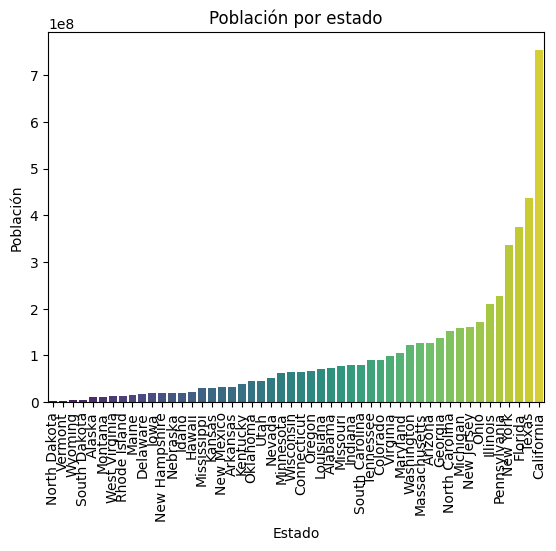

In [4]:
Poblacion_estado=datos[["Population","State_Name"]]
poblacion_estado = Poblacion_estado.groupby('State_Name')['Population'].sum().reset_index().sort_values('Population')
sns.barplot(x='State_Name', y='Population', data=poblacion_estado, palette='viridis')
plt.xlabel('Estado')
plt.ylabel('Población')
plt.title('Población por estado')
plt.xticks(rotation=90)
plt.show()


Una cuestión común y lógica es si hay alguna relación entre la población y el número de muertes por armas de fuego. Para abordar esta cuestión, podemos examinar el coeficiente de correlación de Pearson.

In [5]:
p=datos["Population"].corr(datos["Deaths"])
print("Coeficiente de Correlación: ",p)

Coeficiente de Correlación:  0.8885762403387135


El resultado del coeficiente de correlación de Pearson, 0.8885762403387135, sugiere una correlación positiva fuerte entre la población y el número de muertes por armas de fuego en una región determinada. Esto significa que a medida que la población aumenta, también lo hace el número de muertes por armas de fuego, lo cual es estadísticamente significativo. Este resultado es consistente con la intuición previa de que la población y el número de muertes por armas de fuego están relacionados.

#### Análisis de las muertes por armas de fuego a lo largo del tiempo
Otra pregunta importante a considerar es cómo ha sido la tendencia de las muertes por armas de fuego a lo largo del tiempo y qué información se puede obtener de ella. Una herramienta estadística útil para analizar la asimetría de la distribución de datos es el coeficiente de asimetría. 

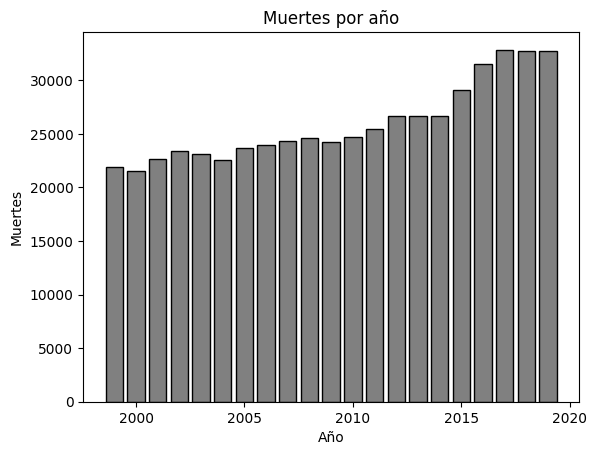

Coeficiente de asimetría:  0.9310198718974468


In [6]:
Muertes_por_año=datos[["Year","Deaths"]].groupby("Year")["Deaths"].sum()
plt.bar(Muertes_por_año.index, Muertes_por_año.values,color="grey", edgecolor="black")
plt.xlabel("Año")
plt.ylabel("Muertes")
plt.title("Muertes por año")
plt.show()
print("Coeficiente de asimetría: ",Muertes_por_año.skew())

Una asimetría positiva de 0.9310198718974468 indica que la distribución de los datos está sesgada hacia la derecha, lo que significa que hay más muertes en los años más recientes que en los años anteriores. Este aumento en las muertes por armas de fuego en los Estados Unidos podría deberse a varios factores, como cambios en las políticas de armas, la mayor disponibilidad de armas, un aumento en la violencia y la criminalidad, así como los problemas de salud mental.

#### Analisís de los estados con más muertes por año a lo largo del tiempo.
Basándonos en el análisis previo sobre la correlación entre la población y las muertes por armas de fuego, nos surgió la inquietud de explorar más a fondo los datos y enfocarnos en los estados con mayores índices de muertes. Por lo tanto, decidimos investigar los tres estados con mayor número de muertes por armas de fuego por año.

<Figure size 2500x2500 with 0 Axes>

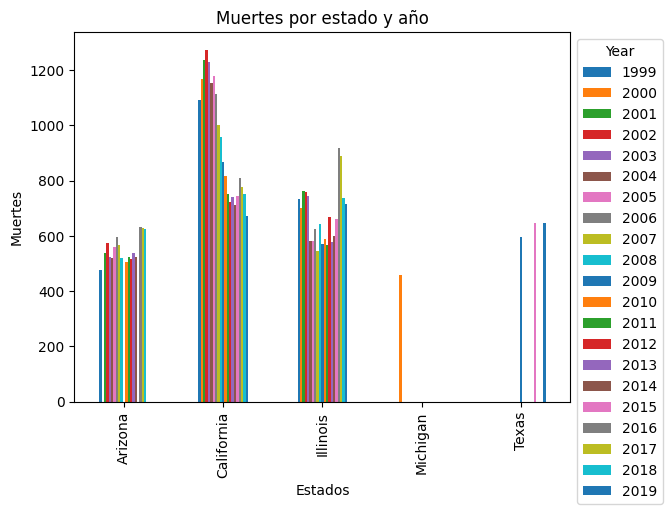

In [7]:
Estados_años=datos[["Year","State_Name","Deaths"]]
Top_estados_por_año=[]
for i in list(datos["Year"].unique()):
    Top_estados_por_año.append(Estados_años[Estados_años["Year"]==i].nlargest(3, "Deaths"))
#graficamos los 3 estamos con más muertes por cada año
df = pd.concat([df for df in Top_estados_por_año])
tabla_pivote = pd.pivot_table(df, values='Deaths', index=['State_Name'], columns=['Year'])
plt.figure(figsize=(25,25))
tabla_pivote.plot(kind='bar')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), title='Year')
plt.xlabel('Estados')
plt.ylabel('Muertes')
plt.title('Muertes por estado y año')
plt.show()

Basándonos en el análisis previo de la correlación entre la población y las muertes por armas, no es sorprendente observar que los tres estados con la mayor cantidad de muertes, a saber, California, Arizona e Illinois, también son los más poblados. Sin embargo, es importante destacar que estos estados presentan ciertas tendencias que deben ser analizadas para comprender mejor la naturaleza

#### California

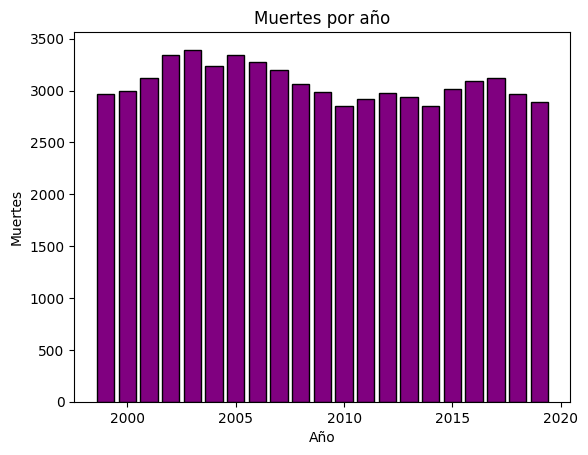

Coeficiente de Correlación:  -0.4950085041116903


In [8]:
California=Estados_años[Estados_años["State_Name"]=="California"].groupby("Year")["Deaths"].sum()
plt.bar(California.index, California.values,color="Purple", edgecolor="black")
plt.xlabel("Año")
plt.ylabel("Muertes")
plt.title("Muertes por año")
plt.show()
#Calculemos la el coeficiente de correlación
California=pd.DataFrame(California)
California=California.reset_index()
p=California["Year"].corr(California["Deaths"])
print("Coeficiente de Correlación: ",p)

Se ha encontrado una correlación negativa moderada de -0.495 entre los años y el número de muertes en California, lo que sugiere una disminución de las muertes con el transcurso del tiempo. A continuación, para tener una mejor comprensión de la distribución de nuestros datos, se procederá a analizar los cuantiles típicos.

In [9]:
print("Primer cuartil (25%):", California['Deaths'].quantile(0.25))
print("Mediana (50%):", California['Deaths'].quantile(0.5))
print("Tercer cuartil (75%):", California['Deaths'].quantile(0.75))

Primer cuartil (25%): 2964.0
Mediana (50%): 3018.0
Tercer cuartil (75%): 3199.0


Basado en el tercer cuartil (75%) de las muertes en California, que se sitúa en 3199, se puede concluir que el 75% de las muertes ocurrieron antes de 2012. Esta disminución en las muertes puede estar relacionada con una serie de leyes aprobadas, como la limitación de armas de asalto firmada por el gobernador de California en julio de 2016, según informó The New York Times en su artículo "California Governor Signs Legislation Limiting Assault Weapons" (1 de julio de 2016) https://www.nytimes.com/2016/07/02/us/california-guns-jerry-brown.html. Además, el estado adoptó algunas de las leyes de control de armas más estrictas del país después de varios tiroteos masivos, según un artículo de Los Angeles Times titulado "California adopted some of the toughest gun control laws in country after multiple mass shootings" (2 de octubre de 2017)https://www.latimes.com/politics/la-pol-ca-gun-bill-timeline-20171002-htmlstory.html 


#### Illinois y Arizona
Consideremos el análisis conjunto de los estados de Arizona e Illinois.

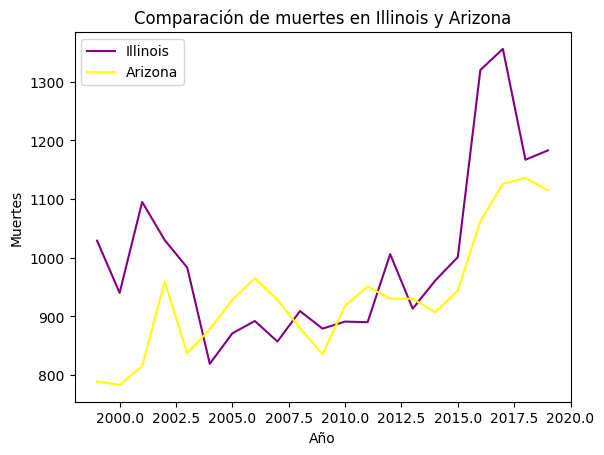

In [10]:
Illinois=Estados_años[Estados_años["State_Name"]=="Illinois"].groupby("Year")["Deaths"].sum()
Arizona=Estados_años[Estados_años["State_Name"]=="Arizona"].groupby("Year")["Deaths"].sum()
fig, ax = plt.subplots()
ax.plot(Illinois.index, Illinois.values, label='Illinois',color="Purple")
ax.plot(Arizona.index, Arizona.values, label='Arizona',color="yellow")
ax.set_xlabel('Año')
ax.set_ylabel('Muertes')
ax.set_title('Comparación de muertes en Illinois y Arizona')
ax.legend()
plt.show()

Después de realizar un análisis gráfico de las muertes por armas de fuego en Arizona e Illinois, se puede notar un aumento en el número de muertes a lo largo del tiempo, con un incremento considerablemente significativo en Illinois a partir del año 2015.

##### Illinois
se realizará un análisis comparativo del porcentaje de cambio entre los períodos de 2010-2014 y 2015-2019.

In [11]:
Illinois=pd.DataFrame(Illinois)
Illinois=Illinois.reset_index()
Illinois_menos=Illinois[(Illinois["Year"]<2015) & (Illinois["Year"]>=2010)]
Illinois_mas=Illinois[Illinois["Year"]>=2015]
Porcentaje_cambio=((Illinois_mas["Deaths"].sum()-Illinois_menos["Deaths"].sum())/Illinois_menos["Deaths"].sum())*100
print("Porcentaje de cambio: ",Porcentaje_cambio)

Porcentaje de cambio:  29.307015661875134


El porcentaje de cambio observado fue de 29.307015661875134, lo que indica un aumento del $29.30\%$ en las muertes por armas de fuego en Illinois durante el periodo comprendido entre los períodos de 2010-2014 y 2015-2019. Pero, ¿Cuáles fueron los condados con el mayor número de muertes por armas de fuego en el periodo 2015-2019?

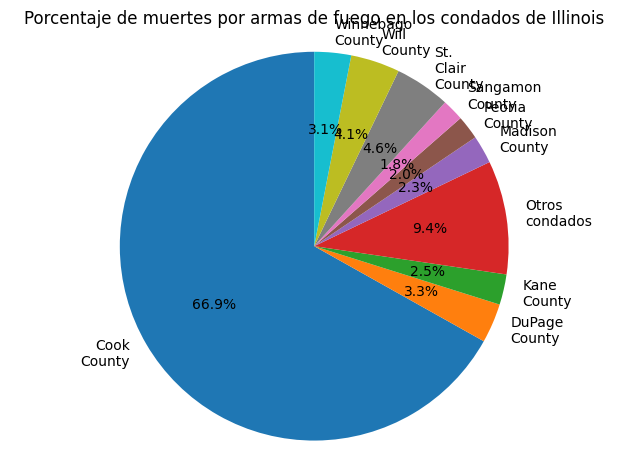

In [12]:
relevante=datos[["Year","County","State_Name","Deaths"]]
Illinois_ultimos_años=relevante[(relevante["Year"]>=2015)&(relevante["State_Name"]=="Illinois")].groupby("County")["Deaths"].sum().reset_index()
otros_condados= Illinois_ultimos_años[Illinois_ultimos_años['Deaths'] < 76]['Deaths'].sum()
df_nuevo = Illinois_ultimos_años[Illinois_ultimos_años['Deaths'] >= 76].copy()
df_nuevo.loc[len(df_nuevo)] = ['Otros condados', otros_condados]
labels = [name.replace(' ', '\n') for name in df_nuevo["County"]]
plt.pie(df_nuevo["Deaths"], labels=labels, autopct='%1.1f%%', startangle=90)
plt.xticks(fontsize=0.8)
plt.title('Porcentaje de muertes por armas de fuego en los condados de Illinois')
plt.axis('equal')
plt.tight_layout()
plt.show()

##### Arizona
se realizará un análisis comparativo del porcentaje de cambio entre los períodos de 2010-2014 y 2015-2019.

In [13]:
Arizona=pd.DataFrame(Arizona)
Arizona=Arizona.reset_index()
Arizona_menos=Arizona[(Arizona["Year"]<2015) & (Arizona["Year"]>=2010)]
Arizona_mas=Arizona[Arizona["Year"]>=2015]
Porcentaje_cambio=((Arizona_mas["Deaths"].sum()-Arizona_menos["Deaths"].sum())/Arizona_menos["Deaths"].sum())*100
print("Porcentaje de cambio: ",Porcentaje_cambio)

Porcentaje de cambio:  16.113028472821398


El porcentaje de cambio observado fue de 16.113028472821398, lo que indica un aumento del $16.11\%$ en las muertes por armas de fuego en Arizona durante el periodo comprendido entre los períodos de 2010-2014 y 2015-2019. ¿Cuáles fueron los condados con el mayor número de muertes por armas de fuego en el periodo 2015-2019?

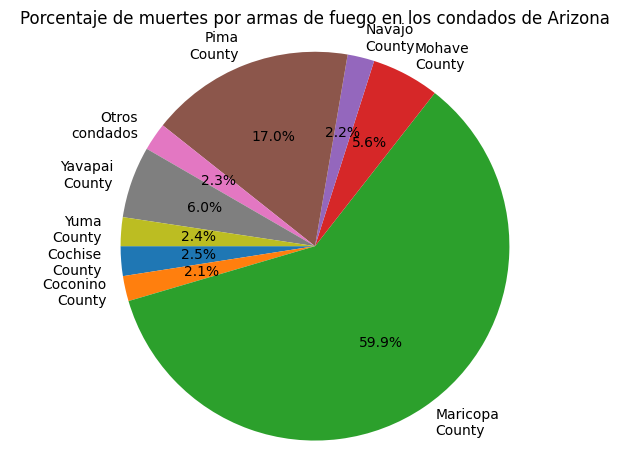

In [14]:
relevante=datos[["Year","County","State_Name","Deaths"]]
Illinois_ultimos_años=relevante[(relevante["Year"]>=2015)&(relevante["State_Name"]=="Arizona")].groupby("County")["Deaths"].sum().reset_index()
otros_condados= Illinois_ultimos_años[Illinois_ultimos_años['Deaths'] < 76]['Deaths'].sum()
df_nuevo = Illinois_ultimos_años[Illinois_ultimos_años['Deaths'] >= 76].copy()
df_nuevo.loc[len(df_nuevo)] = ['Otros condados', otros_condados]
labels = [name.replace(' ', '\n') for name in df_nuevo["County"]]
plt.pie(df_nuevo["Deaths"], labels=labels, autopct='%1.1f%%', startangle=180)
plt.xticks(fontsize=0.8)
plt.title('Porcentaje de muertes por armas de fuego en los condados de Arizona')
plt.axis('equal')
plt.tight_layout()
plt.show()

### Conclusión
En resumen, el análisis de los datos de muertes por armas de fuego en Estados Unidos de 1999 a 2019 muestra una fuerte correlación positiva entre la población y el número de muertes por armas en una región determinada. Además, la distribución de los datos está sesgada hacia la derecha, lo que sugiere que hay más muertes en los años más recientes que en los años anteriores.

El análisis también muestra que los tres estados con la mayor cantidad de muertes por armas de fuego son California, Arizona e Illinois, que también son los más poblados. Sin embargo, cada uno de estos estados presenta ciertas tendencias que deben ser analizadas para comprender mejor la naturaleza de las muertes por armas de fuego.

En California, se observa una correlación negativa moderada entre los años y el número de muertes, lo que sugiere una disminución en las muertes con el transcurso del tiempo. Además, el tercer cuartil de las muertes en California se sitúa en 2012, lo que indica que el 75% de las muertes ocurrieron antes de ese año. Esta disminución en las muertes puede estar relacionada con una serie de leyes aprobadas.

Por otro lado, en Arizona e Illinois, se observa un aumento en el número de muertes por armas de fuego a lo largo del tiempo, con un aumento significativo en Illinois a partir del año 2015. Se observa un aumento del 29.30% en las muertes por armas de fuego en Illinois durante el periodo comprendido entre los períodos de 2010-2014 y 2015-2019, mientras que en Arizona el aumento fue del 16.11%.

Además, se identificaron los condados con el mayor número de muertes por armas de fuego en el periodo 2015-2019, donde el condado con más muertes en Illinois es Cook County con un 66.9%, y el condado con más muertes en Arizona es Maricopa County con un 59.9%.

En general, estos resultados pueden ser útiles para informar la toma de decisiones y políticas públicas que busquen abordar el problema de la violencia armada en los Estados Unidos.
